In [ ]:
# File: PleaseRespond.ipynb
# Author: Lucas Smallcomb
# Email: lucas.smallcomb@gmail.com (Work/personal)/ smallco1@umbc.edu (University)
# Description: This program creates and trains a deep learning model that can delineate 
# between two distinct clusters of generated data, represented by being able to separate 
# a grouping of red cross shapes from a grouping of blue circles. 

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets.samples_generator import make_circles

In [6]:
# Generates dataset of n = 1000
X, y = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.2,
                    random_state=0)

In [7]:
X

array([[ 0.24265541,  0.0383196 ],
       [ 0.04433036, -0.05667334],
       [-0.78677748, -0.75718576],
       ...,
       [ 0.0161236 , -0.00548034],
       [ 0.20624715,  0.09769677],
       [-0.19186631,  0.08916672]])

In [8]:
# Shows dimensions of array X
X.shape

(1000, 2)

Text(0.5, 1.0, 'Blue circles and Red crosses')

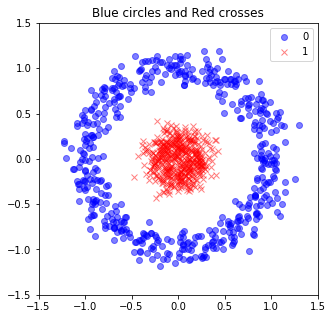

In [9]:
# Build graph of dataset
plt.figure(figsize=(5, 5))
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [11]:
model = Sequential()

In [12]:
model.add(Dense(4, input_shape=(2,), activation='tanh'))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.add(Dense(1, activation='sigmoid'))

In [14]:
# Sets model to train on accuracy using bivariate comparison
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [15]:
# Trains model in 20 iterations of output LOSS/ACC
model.fit(X, y, epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
1000/1000 [==============================] - 0s 204us/step - loss: 0.6635 - acc: 0.6780
Epoch 2/20
1000/1000 [==============================] - 0s 17us/step - loss: 0.5698 - acc: 0.8160
Epoch 3/20
1000/1000 [==============================] - 0s 16us/step - loss: 0.4773 - acc: 0.8500
Epoch 4/20
1000/1000 [==============================] - 0s 17us/step - loss: 0.4117 - acc: 0.8660
Epoch 5/20
1000/1000 [==============================] - 0s 17us/step - loss: 0.3635 - acc: 0.8740
Epoch 6/20
1000/1000 [==============================] - 0s 16us/step - loss: 0.2978 - acc: 0.8960
Epoch 7/20
1000/1000 [==============================] - 0s 16us/step - loss: 0.2170 - acc: 0.9460
Epoch 8/20
1000/1000 [==============================] - 0s 16us/step - loss: 0.1530 - acc: 0.9960
Epoch 9/20
1000/1000 [==============================] - 0s 16us/step - loss: 0.1134 - acc: 0.9990
Epoch 10/20
1000/1000 [==============================] - 0s 16us/step

In [16]:
# Defines prediction regions from training results
hticks = np.linspace(-1.5, 1.5, 101)
vticks = np.linspace(-1.5, 1.5, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]
c = model.predict(ab)
cc = c.reshape(aa.shape)

Text(0.5, 1.0, 'Blue circles and Red crosses')

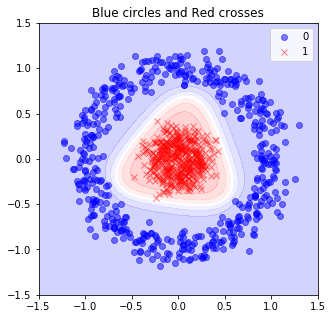

In [17]:
# Uses prediction regions to form visible areas on dataset graph
plt.figure(figsize=(5, 5))
plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")